In [1]:
import warnings ;warnings.filterwarnings('ignore')
import sys ;sys.path.append("../../")
from  CommonFunc_03 import *

Analysis_title("Dive all data 파일 정리  -- 롯데 멤버스 편!")
data_column_info(data_column_info_str="""
- Author : Forrest DPark
- Description :  
.   ◻︎ Topic  :  롯데 멤버스 데이터 정리 
.   ◻︎ Detail : 
.   ◻︎ DataSet Info:
- Update : 
    2024.09.29.Sun . PM 07.37 data 정리 start
""")
DataPreprocessing.plotSetting("default")
import glob
from PIL import Image

✻✻✻✻______🙄 Dive all data 파일 정리  -- 롯데 멤버스 편! 🙄______✻✻✻✻
- Author: Forrest DPark
- Description: 
.   ◻︎ Topic: 롯데 멤버스 데이터 정리
.   ◻︎ Detail: 
.   ◻︎ DataSet Info: 
- Update: 
    2024.09.29.Sun . PM 07.37 data 정리 start
  - ◎ matplot graph set complete


In [2]:
data_dict=data_watch_range(1,5,data_folder_path='./Data/롯데멤버스',)

✻✻✻✻______👻 1-6 번 파일 데이터 보고 분석 👻______✻✻✻✻


Data File 불러오는 중..:  1%|          | 1/100 [elapsed: 00:00 remaining: 01:12]

  - Detected encoding: None


Data File 불러오는 중..:  5%|▌         | 5/100 [elapsed: 00:01 remaining: 00:23]

  - Detected encoding: None
  - Detected encoding: UTF-8-SIG


Data File 불러오는 중..: 12%|█▏        | 12/100 [elapsed: 00:14 remaining: 02:02]

  - Detected encoding: None


Data File 불러오는 중..: 22%|██▏       | 22/100 [elapsed: 00:15 remaining: 00:50]

  - Detected encoding: UTF-8-SIG


Data File 불러오는 중..: 35%|███▌      | 35/100 [elapsed: 00:22 remaining: 00:40]


In [3]:
for i in sorted(data_dict.keys()):
    print(i)
    
test = DataPreprocessing.key_selector(data_dict,4)


1.001_ltmb_layout.xlsx
2.002_ltmb_k7_data.csv
3.003_ltmb_mart_data.csv
4.005_ltmb_lime_table.xlsx
5.006_ltmb_lime_data.xlsx


In [4]:

import pandas as pd 
guid = pd.read_excel("./Data/롯데멤버스/5.006_ltmb_lime_data.xlsx",sheet_name='변수가이드')

In [5]:
df_display_centered(guid[1:])

,변수명,문항
1,SQ1,여러분의 성별은 무엇입니까?
2,1,남성
3,2,여성
4,SQ2,여러분의 연령은 어떻게 되십니까?
5,1,19세 이하
6,2,20세~29세
7,3,30세~39세
8,4,40세~49세
9,5,50세~59세
10,6,60세 이상


In [8]:
## test 에서 SQ1 만 추출한다
def one_column_analysis(df,target_col):
    # 기본 통계 분석
    col = df[target_col]
    print(yellow("--- basic statistics"))
    print("평균:", col.mean())
    print("중앙값:", col.median())
    print("표준 편차:", col.std())
    print(yellow("--- value counts"))
    print(col.value_counts())
    print(yellow("--- visualization"))
    col.hist()
def ki_square_test(df,col1,col2):
    import pandas as pd
    from scipy.stats import chi2_contingency

    gender_column = df["col1"]
    job_title_column = df["col2"]

    # 카이제곱 검정
    contingency_table = pd.crosstab(gender_column, job_title_column)
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print("카이제곱 통계량:", chi2)
    print("p-value:", p)
def correlation_test(df,col1,col2):
    import pandas as pd
    from scipy.stats import pearsonr

    # 데이터 불러오기


    # "age"와 "salary" 칼럼 분석
    age_column = df["col1"]
    salary_column = df["col2"]

    # 상관관계 분석
    correlation, p_value = pearsonr(age_column, salary_column)
    print("상관관계:", correlation)
    print("p-value:", p_value)

    # 회귀 분석
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(age_column.values.reshape(-1, 1), salary_column)
    print("회귀 계수:", model.coef_)
    print("절편:", model.intercept_)

# one_column_analysis(test, 'SQ1')
# ki_square_test(test,'SQ1','SQ2')
# DataPreprocessing.dataInfo2(test)

## SQ3 설문 답변 통계

In [9]:
## SQ3 추출 후 분석 : 여러분이나 여러분의 가족 중 다음과 같은 회사에 근무하시는 분이 계십니까?
# SQ3_1   광고회사/홍보회사/마케팅컨설팅 회사
# SQ3_2	시장조사회사
# SQ3_3	방송/언론사
# SQ3_4	컨설팅/경영자문 회사
# SQ3_9999	해당 없음
print(rainbow_orange(f"광고회사/홍보회사/마케팅컨설팅 회사 : ")+yellow(f"{len(test['SQ3_1'][test['SQ3_1'].notna()])}"))
print(rainbow_orange(f"시장조사회사 : ")+yellow(f"{len(test['SQ3_2'][test['SQ3_2'].notna()])}"))
print(rainbow_orange(f"방송/언론사 : ")+yellow(f"{len(test['SQ3_3'][test['SQ3_3'].notna()])}"))
print(rainbow_orange(f"컨설팅/경영자문 회사 : ")+yellow(f"{len(test['SQ3_4'][test['SQ3_4'].notna()])}"))
print(rainbow_orange(f"해당 없음 : ")+yellow(f"{len(test['SQ3_9999'][test['SQ3_9999'].notna()])}"))

광고회사/홍보회사/마케팅컨설팅 회사 : 0
시장조사회사 : 0
방송/언론사 : 0
컨설팅/경영자문 회사 : 0
해당 없음 : 1000


## SQ4 설문 답변 통계
- 귀하께서는 현재 어디에 거주하고 계신가요?


In [73]:

test = DataPreprocessing.key_selector(data_dict, 4)

region_mapping = {
        1 : '서울특별시',
    2 : '부산광역시',
    3 : '인천광역시',
    4 : '대구광역시',
    5 : '대전광역시',
    6 : '광주광역시',
    7 : '울산광역시',
    8 : '경기도',
    9 : '충청북도',
    10 : '충청남도',
    11 : '전라북도',
    12 : '전라남도',
    13 : '경상북도',
    14 : '경상남도',
    15 : '강원도',
    16 : '세종특별자치시',
    17 : '제주특별자치도'
    
}

sq4=test['SQ4'].map(region_mapping)
sq4.value_counts()
test['거주지']=sq4



## 부산광역시가 없음 : all data 에서 부산시민을 제외한 타지역 사람들에게 설문한것 같음

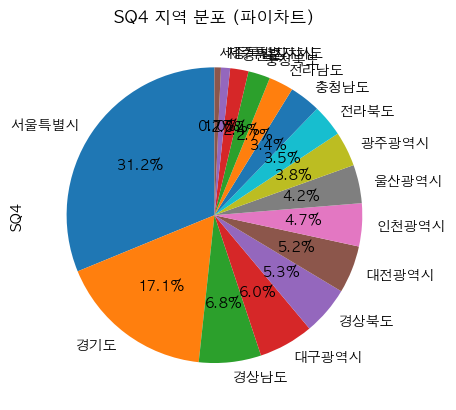

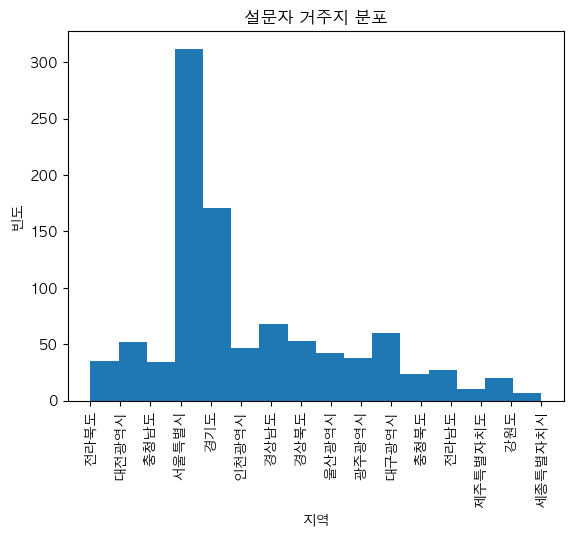

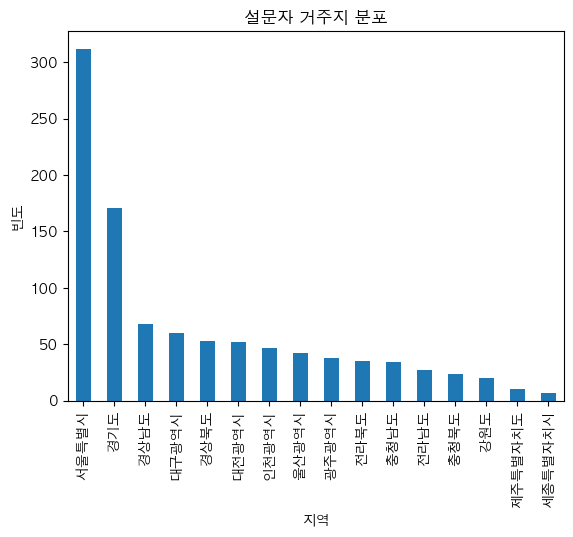

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성 (예시 데이터)
data = pd.DataFrame({'SQ4': sq4})


# 파이차트 시각화
sq4.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('SQ4 지역 분포 (파이차트)')
plt.show()

# 히스토그램 시각화
plt.hist(data['SQ4'], bins=len(data['SQ4'].unique()))
plt.xlabel('지역')
plt.ylabel('빈도')
plt.title('설문자 거주지 분포')
plt.xticks(rotation=90)  # x축 레이블 회전
plt.show()

# 추가 시각화 옵션:

# 1. 막대 그래프 (bar chart):
data['SQ4'].value_counts().plot(kind='bar')
plt.title('설문자 거주지 분포')
plt.xlabel('지역')
plt.ylabel('빈도')
plt.show()



## AQ1 거주 만족도

In [76]:
## AQ1. 귀하께서는 현재 거주하고 계시는 거주지{SQ4}에 대해 전반적으로 얼마나 만족하시나요?

# test['SQ4'].map(region_mapping)
test_01=test
test['거주만족도']=test['AQ1']
test[['거주지','거주만족도']]

,거주지,거주만족도
0,전라북도,2
1,대전광역시,3
2,충청남도,4
3,서울특별시,4
4,경기도,4
...,...,...
995,제주특별자치도,3
996,광주광역시,4
997,서울특별시,4
998,경상남도,3


In [99]:
test['거주만족도']

0      2
1      3
2      4
3      4
4      4
      ..
995    3
996    4
997    4
998    3
999    3
Name: 거주만족도, Length: 1000, dtype: int64

<Figure size 1200x600 with 0 Axes>

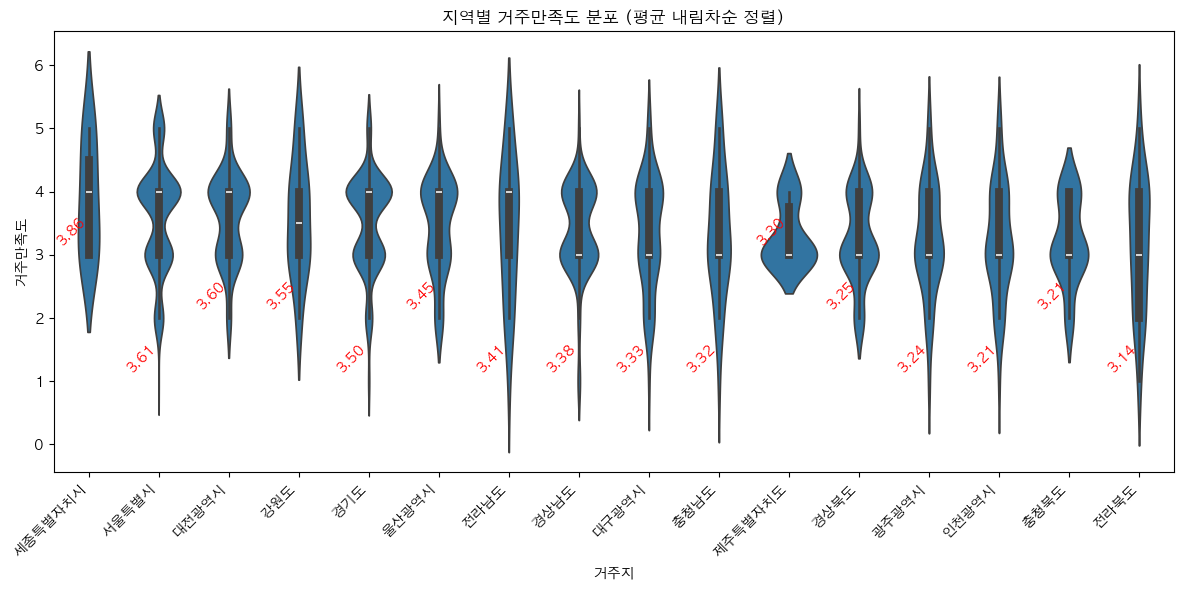

In [108]:
def violine_statics(test,grouby_col,static_col):
    import seaborn as sns
    plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치


    # 지역별 거주 만족도 평균 계산
    mean_satisfaction = test.groupby(grouby_col)[static_col].mean().sort_values(ascending=False)
    min_satisfaction = test.groupby(grouby_col)[static_col].min().sort_values(ascending=False)

    # 평균이 가장 높은 지역이 왼쪽에 오도록 정렬된 순서대로 지역 목록 생성
    sorted_regions = mean_satisfaction.index.tolist()
    sorted_regions_min = min_satisfaction.index.tolist()

    # 그림 크기 조정
    plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치

    # 지역별 거주 만족도 바이올린 플롯 (정렬)
    ax =sns.violinplot(x=grouby_col, y=static_col, data=test, order=sorted_regions)


    # 각 빈 위에 평균값 표시
    for i, region in enumerate(sorted_regions):
        mean_value = mean_satisfaction[region]
        min_value = min_satisfaction[region]
        ax.text(i, min_value + 0.1, f'{mean_value:.2f}', ha='right', va='bottom',rotation=45,color ='red')  # 
        
    plt.xlabel(grouby_col)
    plt.ylabel(static_col)
    plt.title(f'지역별 {static_col} 분포 (평균 내림차순 정렬)')
    plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()
violine_statics(test,'거주지','거주만족도')

## AQ2 거주 지속 생각 여부 :(5 매우 그렇다)

<Figure size 1200x600 with 0 Axes>

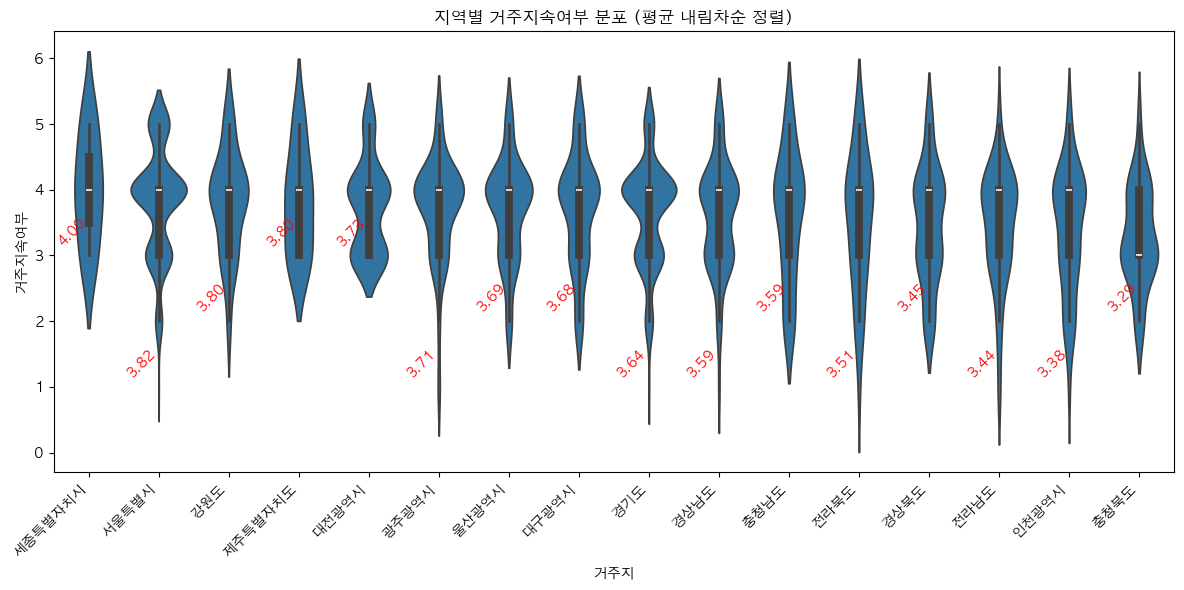

In [109]:

test['거주지속여부']=test['AQ2']
violine_statics(test,'거주지','거주지속여부')


## AQ3_1 : 지역이전시 고려요소 
    -

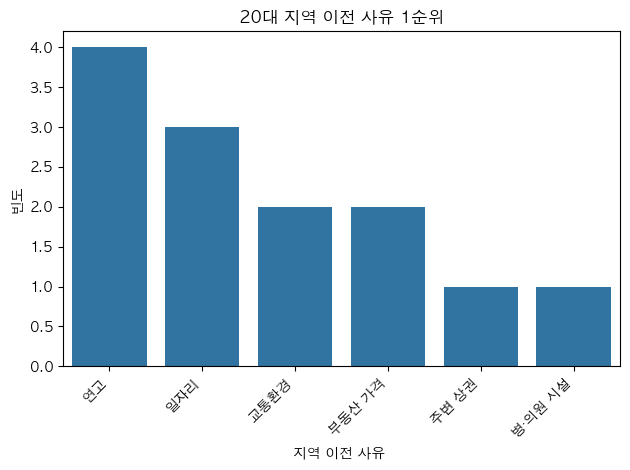

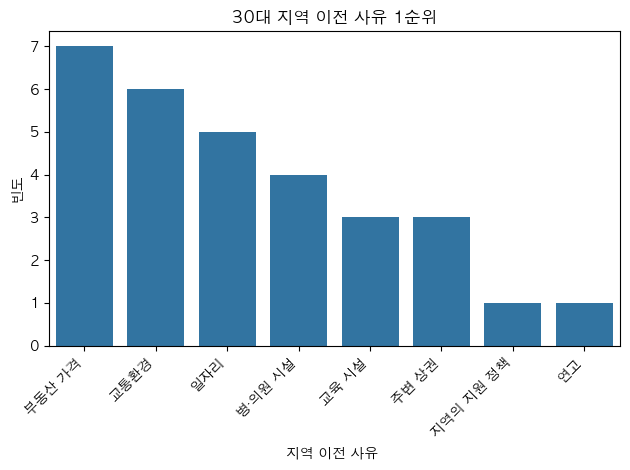

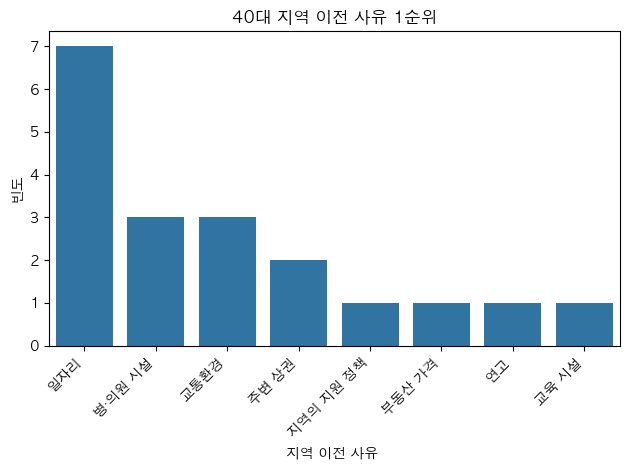

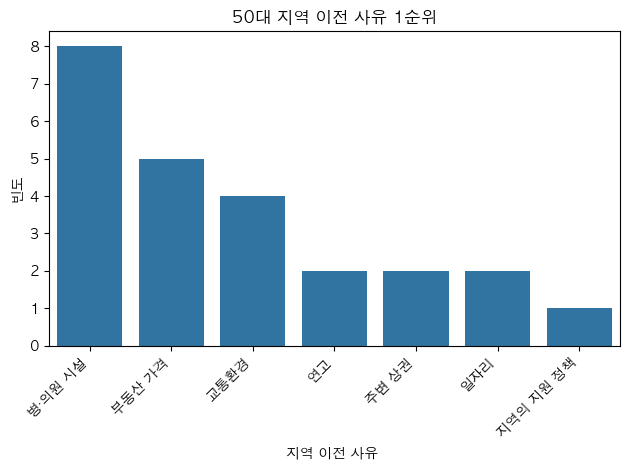

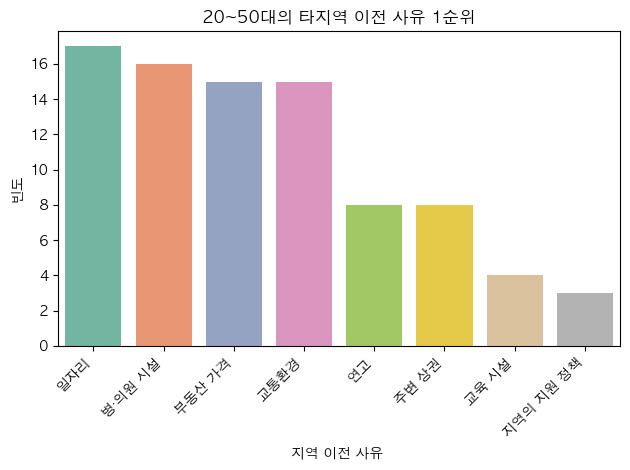

In [260]:
def reason_to_move(test):
    import matplotlib.pyplot as plt
    import seaborn as sns
    aq3 =test[['AQ3_1','AQ3_2','AQ3_3']].fillna(0)
    reason_mapping ={
        1:'일자리',
        2:	'교통환경',
        3:	'주변 상권',
        4:	'병·의원 시설',
        5:	'교육 시설',
        6:	'지역의 지원 정책',
        7:	'연고',
        8:	'부동산 가격'
    }
    aq3.replace(reason_mapping,inplace=True)
    # aq3['AQ3_1'].value_counts()
    value_counts = aq3['AQ3_1'].value_counts()
    # aq3['AQ3_1'].value_counts() 결과를 막대 그래프로 표시
    value_counts = value_counts[value_counts.index != 0.0]
    sns.barplot(x=value_counts.index, y=value_counts.values,palette='Set2')
    plt.xlabel('지역 이전 사유 ')
    plt.ylabel('빈도')
    plt.title(f'20~50대의 타지역 이전 사유 1순위')
    plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()

def reason_to_move_by_age(test, age =2):
    import matplotlib.pyplot as plt
    import seaborn as sns
    test = test[test['SQ2']==age]
    aq3 =test[['AQ3_1','AQ3_2','AQ3_3']].fillna(0)
    reason_mapping ={
        1:'일자리',
        2:	'교통환경',
        3:	'주변 상권',
        4:	'병·의원 시설',
        5:	'교육 시설',
        6:	'지역의 지원 정책',
        7:	'연고',
        8:	'부동산 가격'
    }
    aq3.replace(reason_mapping,inplace=True)
    # aq3['AQ3_1'].value_counts()
    value_counts = aq3['AQ3_1'].value_counts()
    # aq3['AQ3_1'].value_counts() 결과를 막대 그래프로 표시
    value_counts = value_counts[value_counts.index != 0.0]
    sns.barplot(x=value_counts.index, y=value_counts.values)
    plt.xlabel('지역 이전 사유 ')
    plt.ylabel('빈도')
    plt.title(f'{age*10}대 지역 이전 사유 1순위')
    plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()
for i in range(2,6):reason_to_move_by_age(test,age=i)

reason_to_move(test)
    

## ◎ 연령대별 거주 만족도, 거주지속여부, 거주이전사유를 뿌려보자.

<Figure size 1200x600 with 0 Axes>

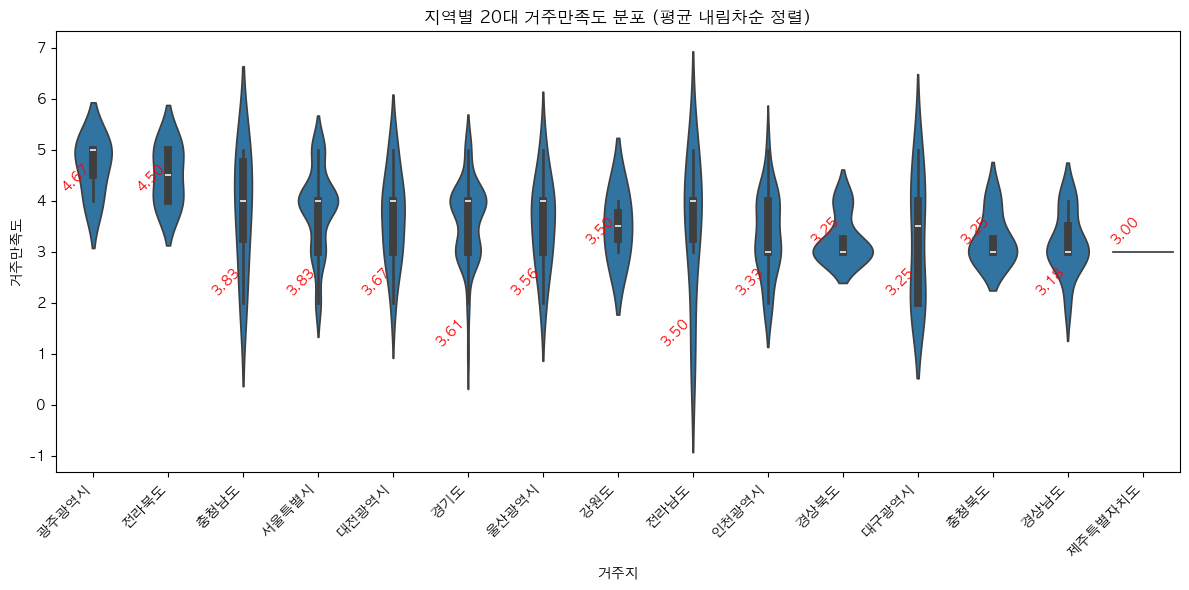

<Figure size 1200x600 with 0 Axes>

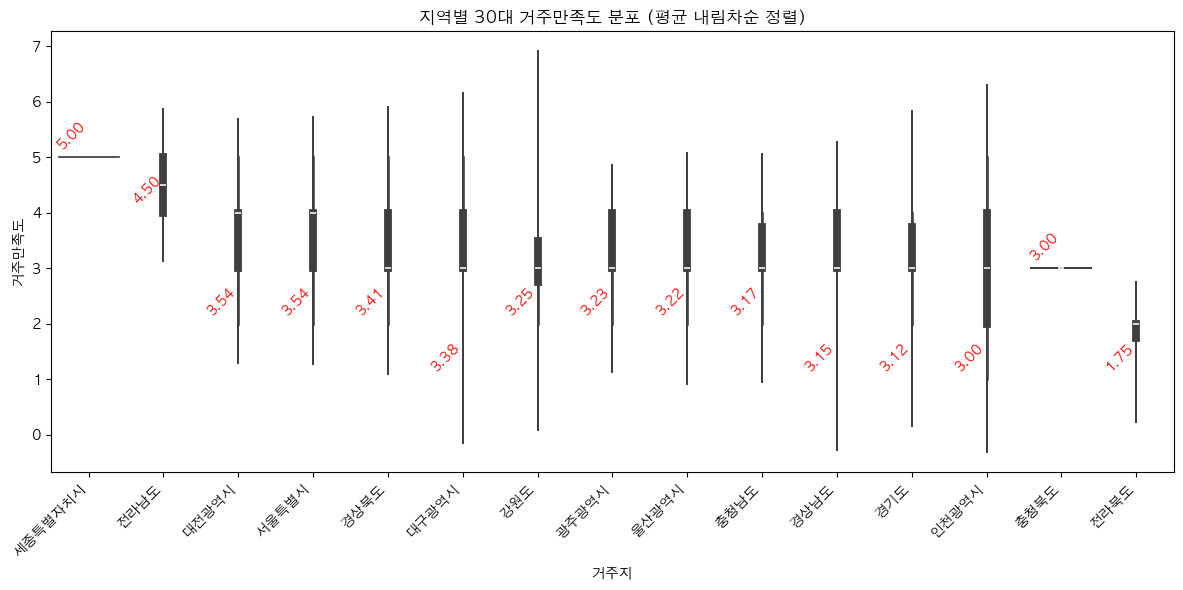

<Figure size 1200x600 with 0 Axes>

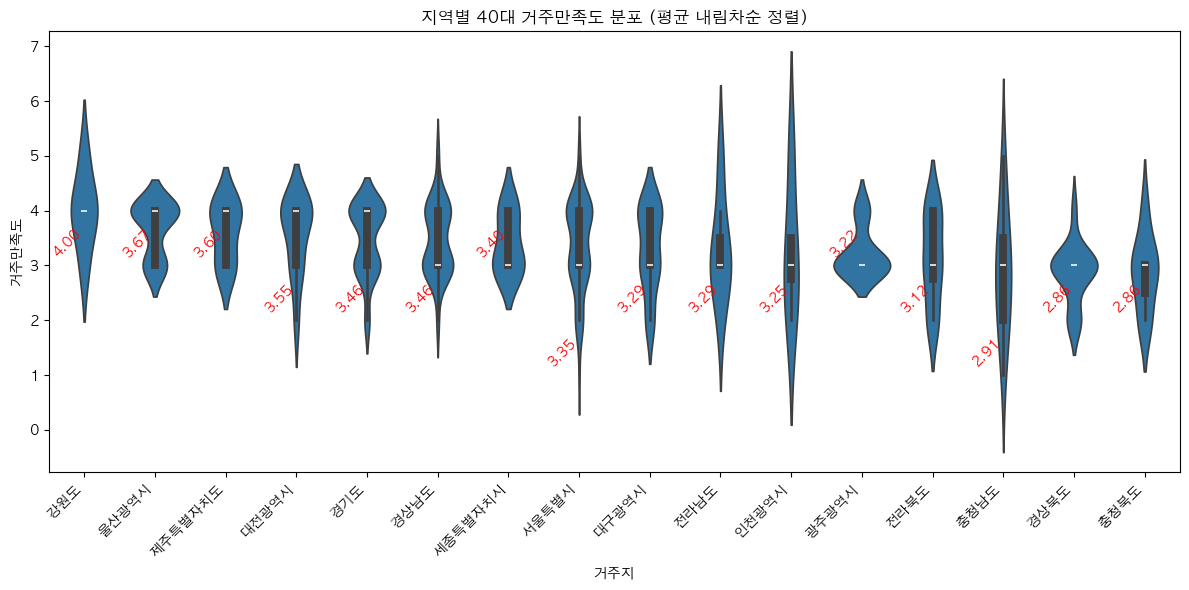

<Figure size 1200x600 with 0 Axes>

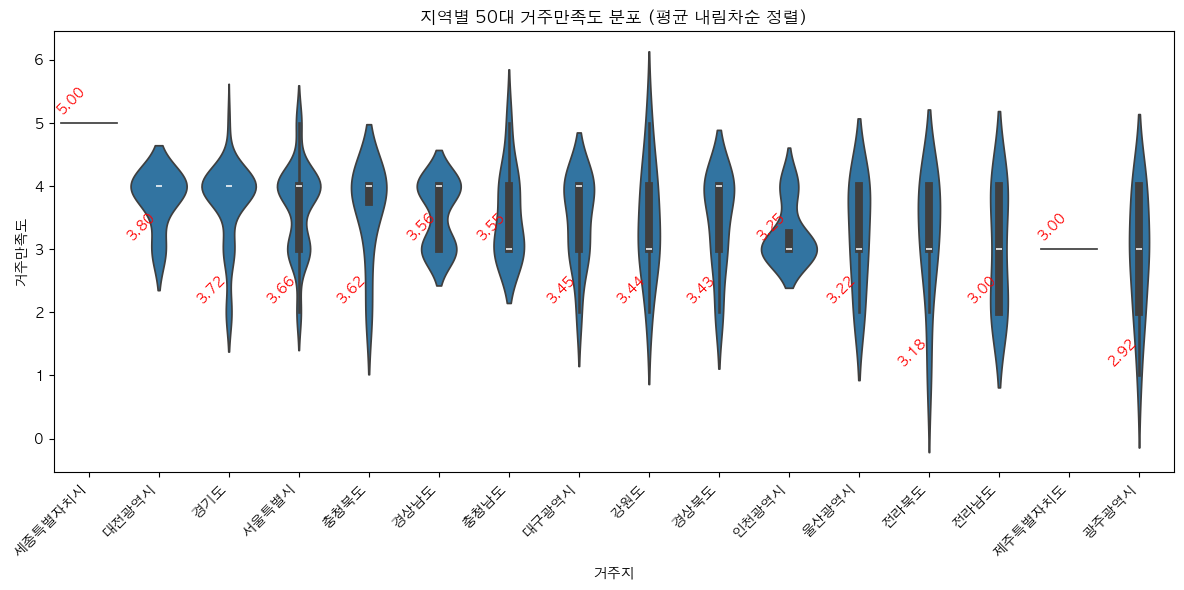

<Figure size 1200x600 with 0 Axes>

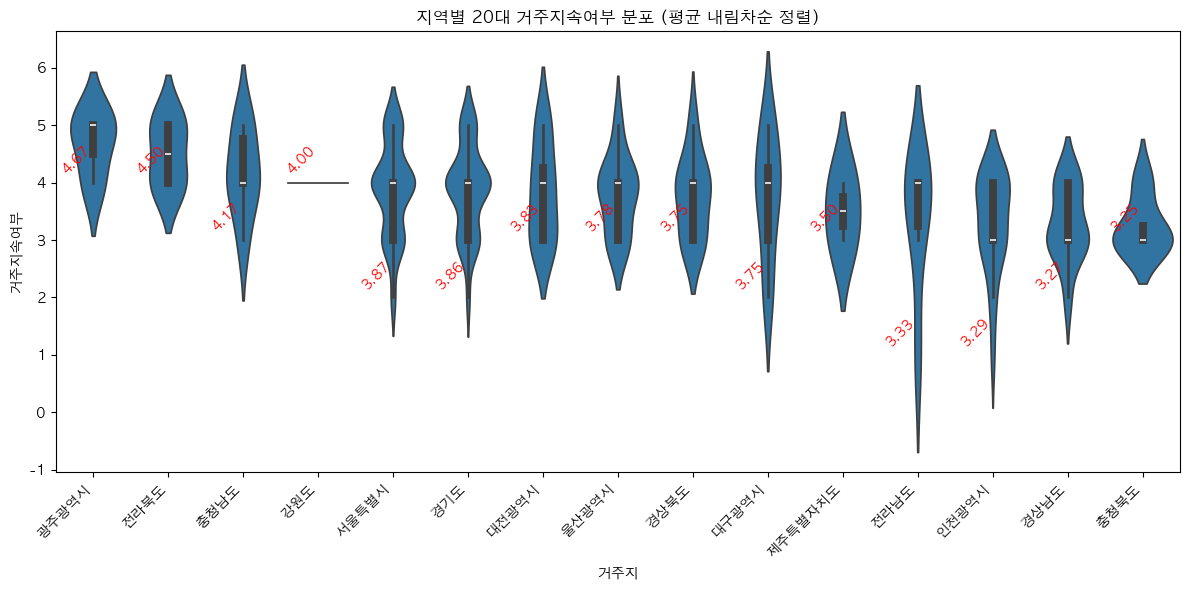

<Figure size 1200x600 with 0 Axes>

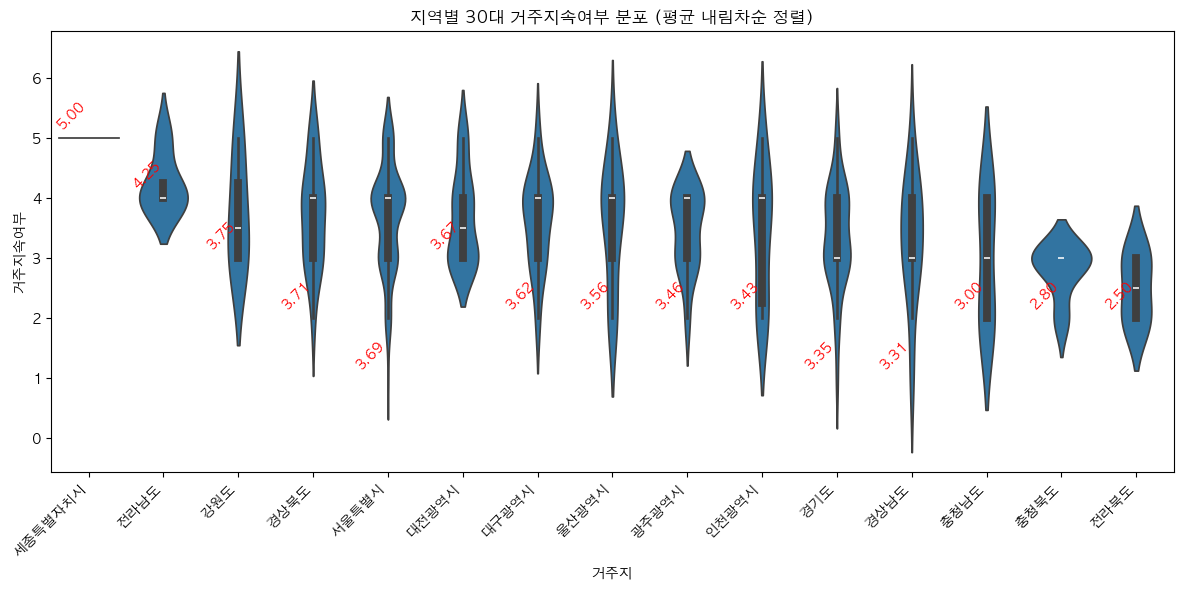

<Figure size 1200x600 with 0 Axes>

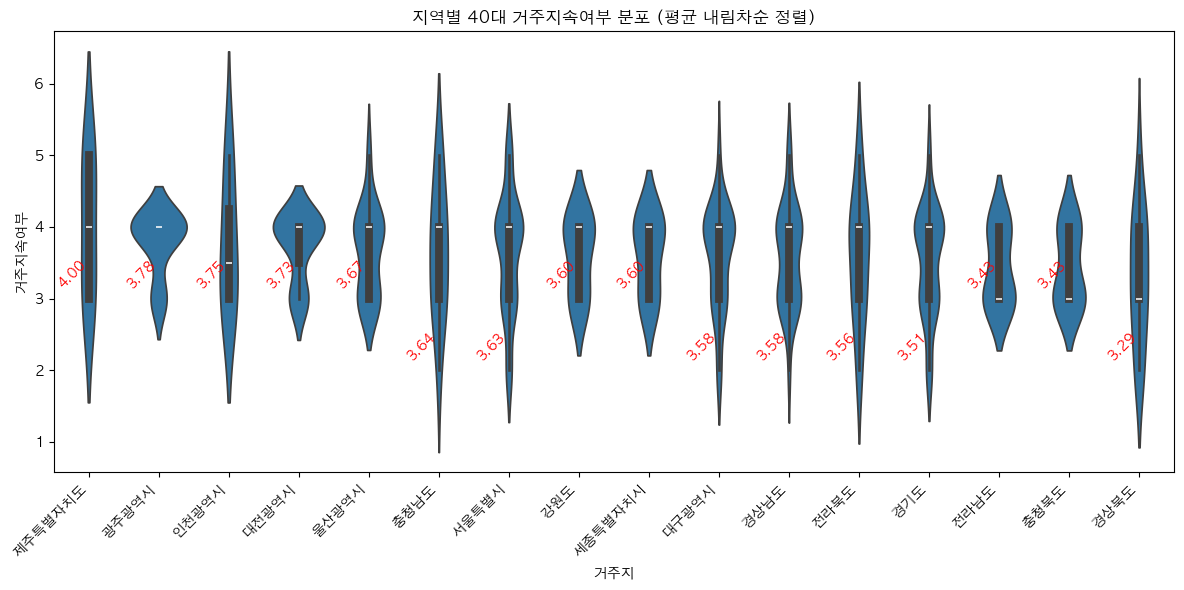

<Figure size 1200x600 with 0 Axes>

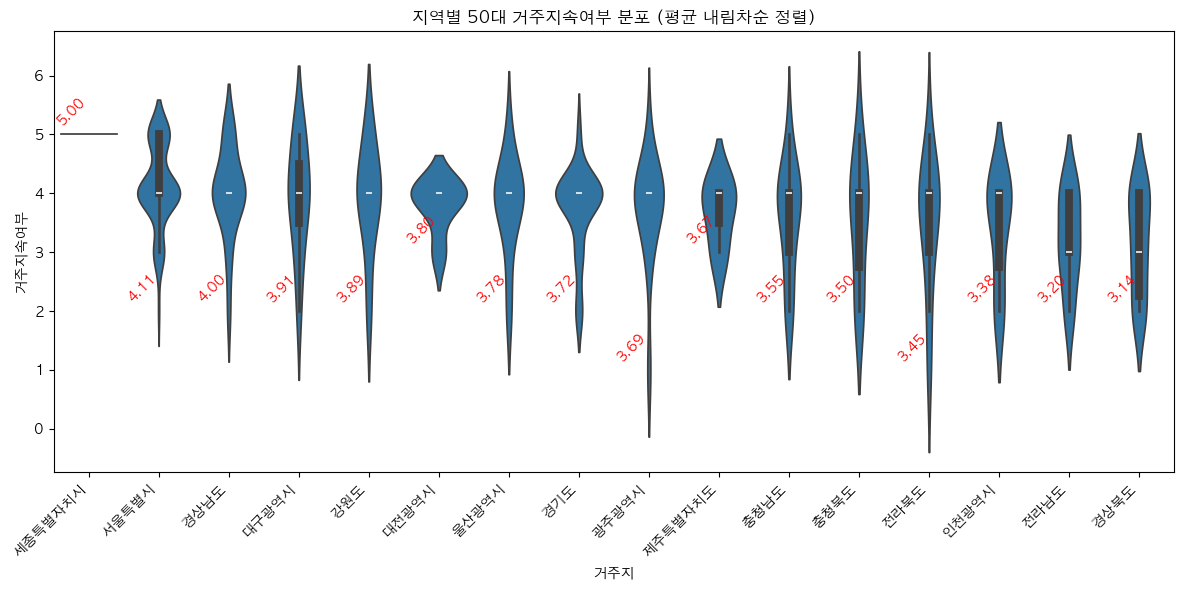

In [124]:
def violine_statics_by_age(test,grouby_col,static_col,age =2):
    import seaborn as sns
    plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치
    
    test = test[test['SQ2']==age]
    # 지역별 거주 만족도 평균 계산
    mean_satisfaction = test.groupby(grouby_col)[static_col].mean().sort_values(ascending=False)
    min_satisfaction = test.groupby(grouby_col)[static_col].min().sort_values(ascending=False)

    # 평균이 가장 높은 지역이 왼쪽에 오도록 정렬된 순서대로 지역 목록 생성
    sorted_regions = mean_satisfaction.index.tolist()
    sorted_regions_min = min_satisfaction.index.tolist()

    # 그림 크기 조정
    plt.figure(figsize=(12, 6))  # 가로 12인치, 세로 6인치

    # 지역별 거주 만족도 바이올린 플롯 (정렬)
    ax =sns.violinplot(x=grouby_col, y=static_col, data=test, order=sorted_regions)


    # 각 빈 위에 평균값 표시
    for i, region in enumerate(sorted_regions):
        mean_value = mean_satisfaction[region]
        min_value = min_satisfaction[region]
        ax.text(i, min_value + 0.1, f'{mean_value:.2f}', ha='right', va='bottom',rotation=45,color ='red')  # 
        
    plt.xlabel(grouby_col)
    plt.ylabel(static_col)
    plt.title(f'지역별 {age*10}대 {static_col} 분포 (평균 내림차순 정렬)')
    plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()

for age in range(2,6):violine_statics_by_age(test,'거주지','거주만족도',age=age)
for age in range(2,6):violine_statics_by_age(test,'거주지','거주지속여부',age=age)
    

## AQ4 가장 살아보고 싶은 지역은

In [129]:
test['살고싶은지역']=test['AQ4'].map(region_mapping)

In [131]:
test[['거주지','살고싶은지역']]

,거주지,살고싶은지역
0,전라북도,제주특별자치도
1,대전광역시,대전광역시
2,충청남도,제주특별자치도
3,서울특별시,서울특별시
4,경기도,제주특별자치도
...,...,...
995,제주특별자치도,서울특별시
996,광주광역시,제주특별자치도
997,서울특별시,서울특별시
998,경상남도,제주특별자치도


강원도



거주지,서울특별시,경기도,경상남도,강원도,경상북도,대전광역시,전라남도,대구광역시,울산광역시,인천광역시
강원도,13.0,7.0,3.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0


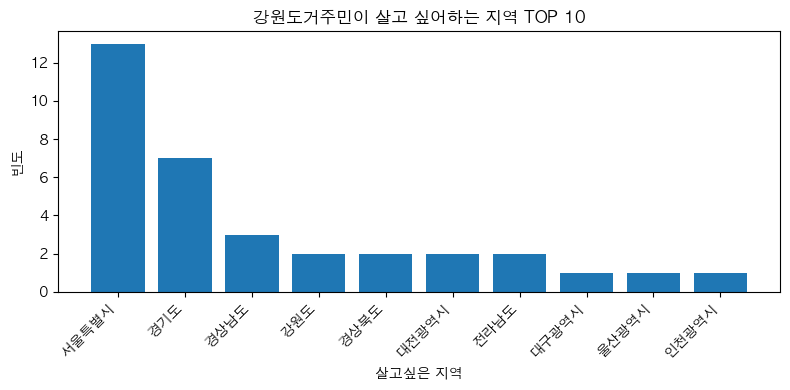

경기도



거주지,경기도,서울특별시,충청남도,인천광역시,광주광역시,대전광역시,대구광역시,경상북도,전라남도,전라북도
경기도,55.0,23.0,8.0,7.0,5.0,4.0,3.0,2.0,2.0,2.0


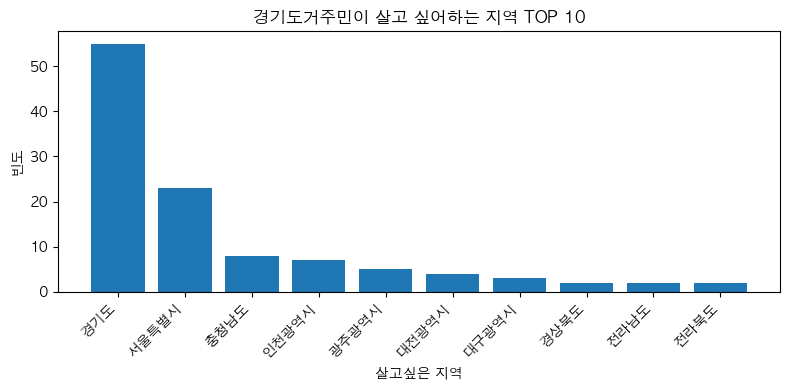

경상남도



거주지,경상남도,서울특별시,경상북도,대구광역시,충청북도,울산광역시,인천광역시,강원도,경기도,광주광역시
경상남도,13.0,4.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0


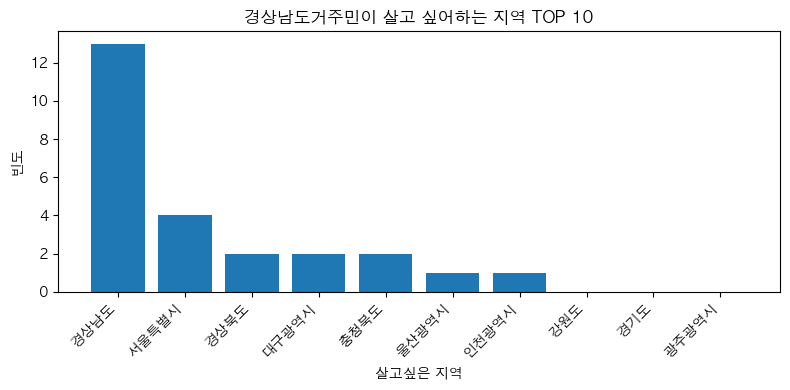

경상북도



거주지,경상북도,대구광역시,강원도,경기도,경상남도,광주광역시,대전광역시,서울특별시,세종특별자치시,울산광역시
경상북도,14.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


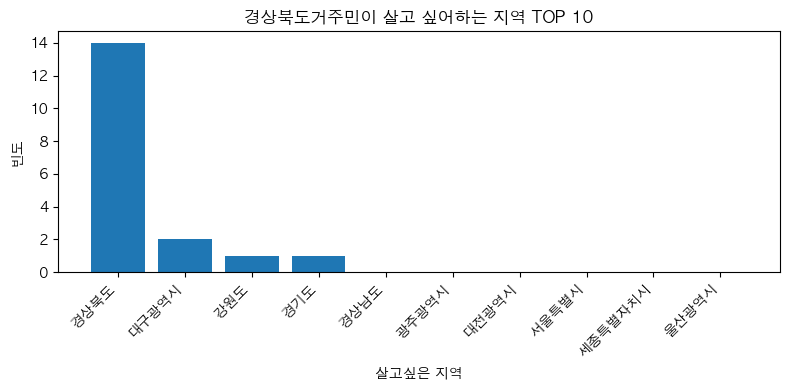

광주광역시



거주지,광주광역시,인천광역시,강원도,경기도,경상남도,대전광역시,충청북도,경상북도,대구광역시,서울특별시
광주광역시,8.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0


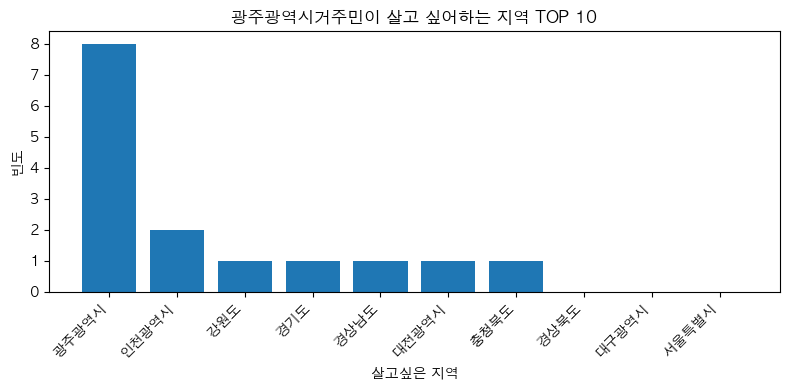

대구광역시



거주지,대구광역시,경상북도,경기도,대전광역시,서울특별시,강원도,경상남도,광주광역시,세종특별자치시,울산광역시
대구광역시,16.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


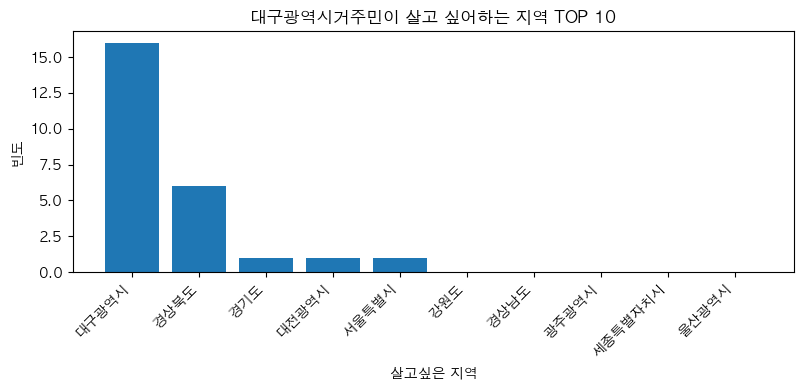

대전광역시



거주지,대전광역시,서울특별시,경기도,경상남도,전라북도,경상북도,울산광역시,강원도,광주광역시,대구광역시
대전광역시,14.0,6.0,3.0,3.0,3.0,2.0,2.0,1.0,1.0,1.0


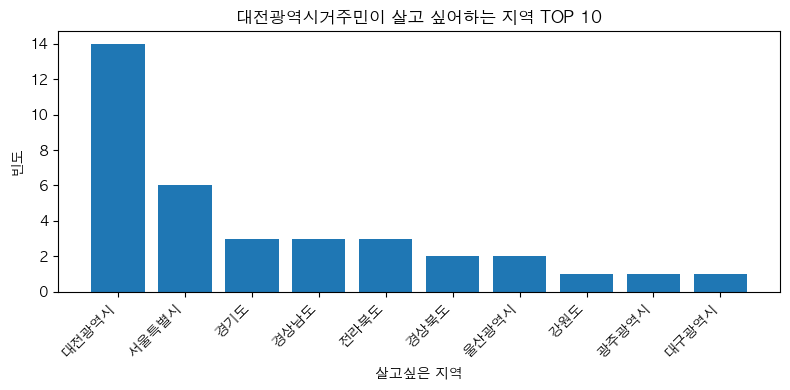

부산광역시



거주지,서울특별시,경기도,경상남도,대전광역시,대구광역시,인천광역시,광주광역시,울산광역시,충청북도,강원도
부산광역시,26.0,8.0,7.0,7.0,5.0,5.0,3.0,3.0,2.0,1.0


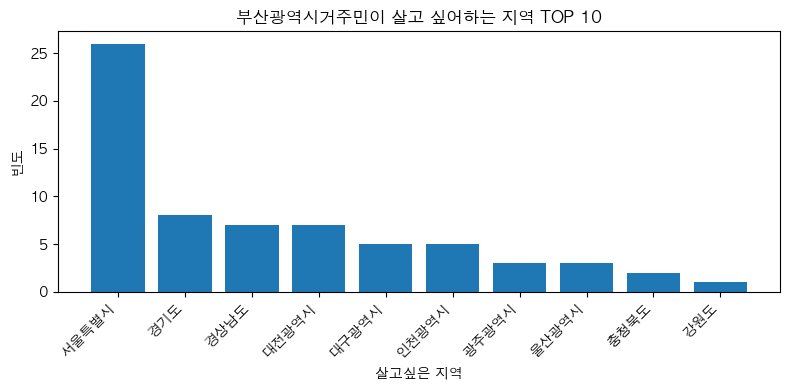

서울특별시



거주지,서울특별시,경기도,인천광역시,경상남도,대구광역시,울산광역시,경상북도,대전광역시,전라북도,광주광역시
서울특별시,177.0,60.0,22.0,16.0,16.0,15.0,12.0,11.0,9.0,6.0


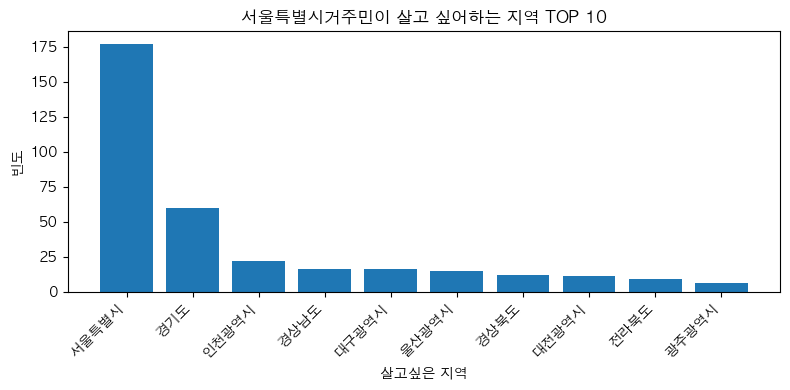

세종특별자치시



거주지,서울특별시,경기도,대전광역시,전라북도,강원도,경상남도,경상북도,대구광역시,세종특별자치시,충청남도
세종특별자치시,8.0,4.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


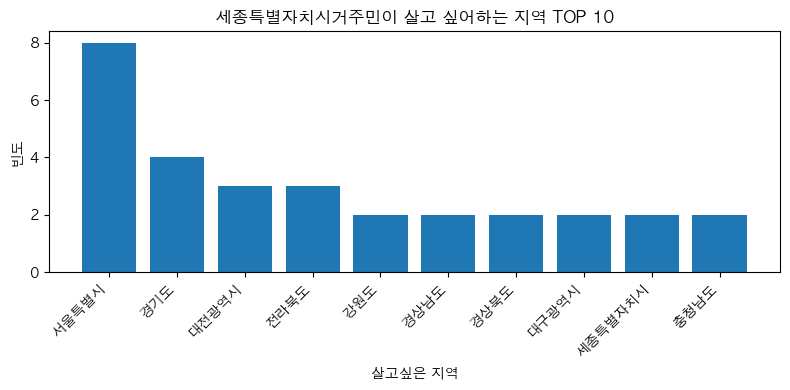

울산광역시



거주지,울산광역시,서울특별시,경상남도,경기도,강원도,경상북도,광주광역시,대구광역시,대전광역시,세종특별자치시
울산광역시,11.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


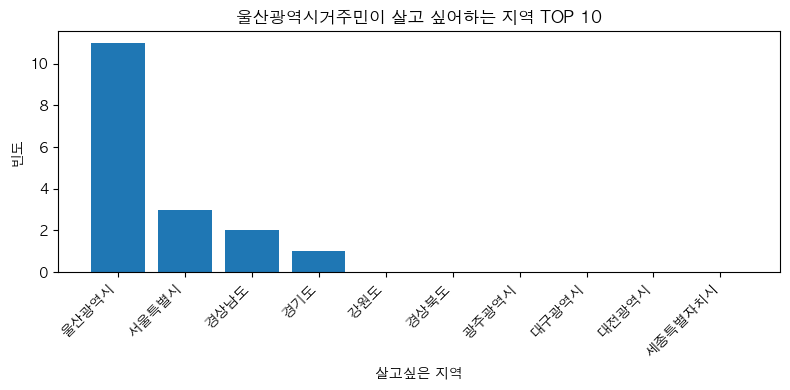

인천광역시



거주지,서울특별시,인천광역시,경상북도,울산광역시,경기도,경상남도,광주광역시,대구광역시,전라북도,충청남도
인천광역시,7.0,7.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


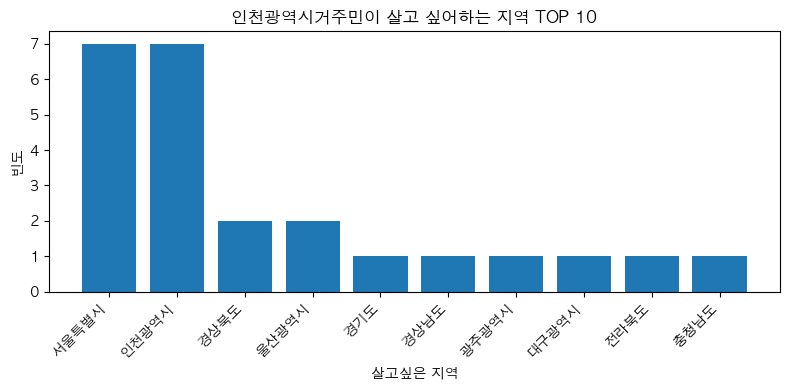

전라남도



거주지,전라남도,경기도,광주광역시,서울특별시,경상남도,대전광역시,전라북도,제주특별자치도,충청남도,충청북도
전라남도,13.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


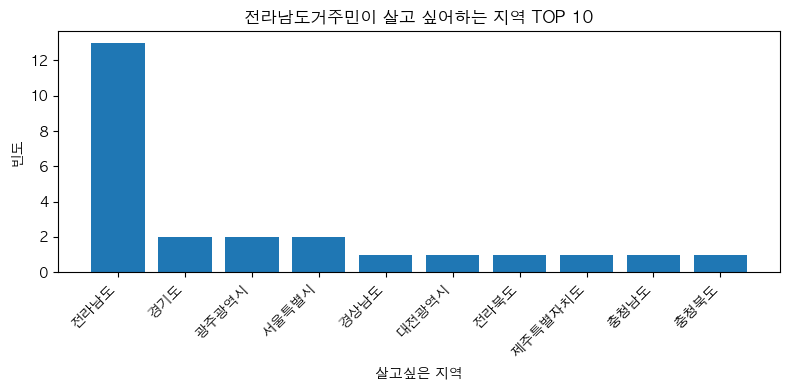

전라북도



거주지,전라북도,강원도,경기도,광주광역시,제주특별자치도,충청북도,경상남도,경상북도,대구광역시,대전광역시
전라북도,6.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


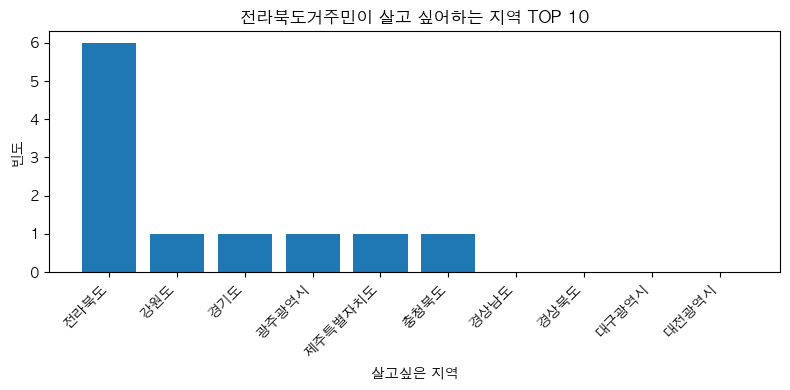

제주특별자치도



거주지,서울특별시,경기도,경상남도,광주광역시,대구광역시,경상북도,대전광역시,전라북도,충청남도,울산광역시
제주특별자치도,39.0,20.0,18.0,11.0,11.0,7.0,7.0,7.0,7.0,6.0


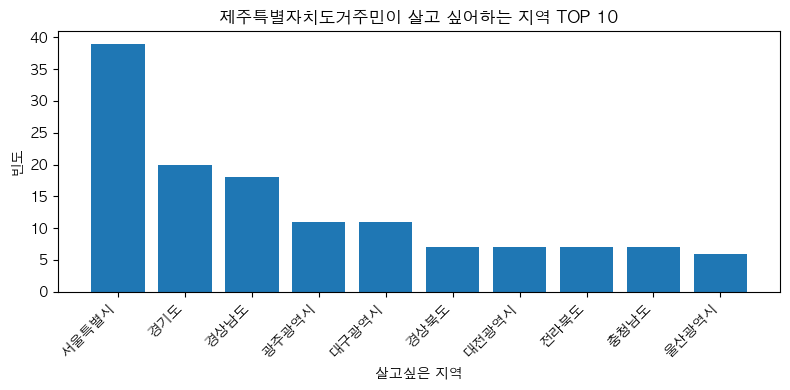

충청남도



거주지,충청남도,경기도,전라북도,충청북도,경상북도,대전광역시,서울특별시,전라남도,제주특별자치도,강원도
충청남도,8.0,4.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0


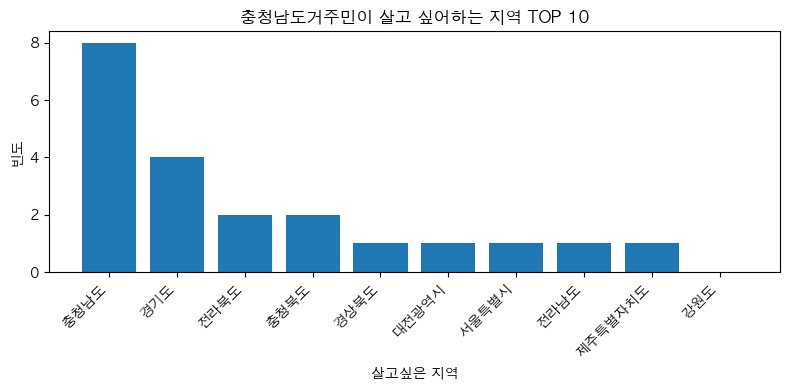

충청북도



거주지,충청북도,경기도,서울특별시,전라북도,강원도,경상남도,경상북도,광주광역시,대구광역시,대전광역시
충청북도,6.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


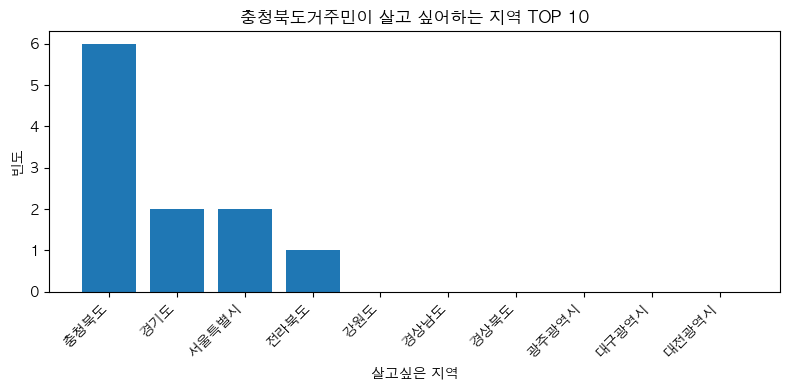

In [200]:
df= test
wanted_region_to_live = df.groupby('거주지')['살고싶은지역'].value_counts().unstack()
wanted_region_to_live.fillna(0,inplace=True)
# 각 칼럼에서 상위 3개 지역만 추출
for i in wanted_region_to_live.columns:
    target = wanted_region_to_live[i].nlargest(10)
    print(target.name)
    df= pd.DataFrame(target)
    df_display_centered(df.T)
    # 막대 그래프 그리기
    plt.figure(figsize=(8, 4))  # 그래프 크기 조정
    plt.bar(x=target.index, height=target.values)

    plt.xlabel('살고싶은 지역')
    plt.ylabel('빈도')
    plt.title(f'{i}거주민이 살고 싶어하는 지역 TOP 10')
    plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
    plt.tight_layout()  # 그래프 레이아웃 조정
    plt.show()

    

### 부산은 다른지역에서 살고싶은지역이라고 답변한 횟수가 각 지역마다 얼마나 될까?




In [201]:
wanted_region_to_live['전체']=wanted_region_to_live.apply(sum,axis=1)


In [203]:
want_busan =pd.DataFrame()

want_busan['거주지별_부산응답자수']=wanted_region_to_live['부산광역시']
want_busan['전체']=wanted_region_to_live['전체']


In [207]:
want_busan

,거주지별_부산응답자수,전체
거주지,,
강원도,1.0,20.0
경기도,8.0,171.0
경상남도,7.0,68.0
경상북도,1.0,53.0
광주광역시,3.0,38.0
대구광역시,5.0,60.0
대전광역시,7.0,52.0
서울특별시,26.0,312.0
세종특별자치시,0.0,7.0


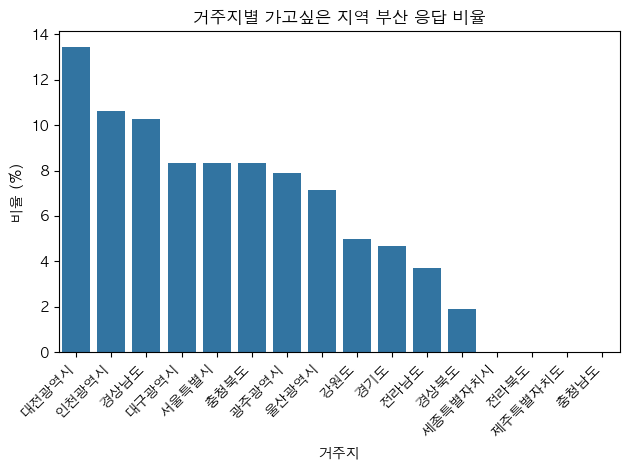

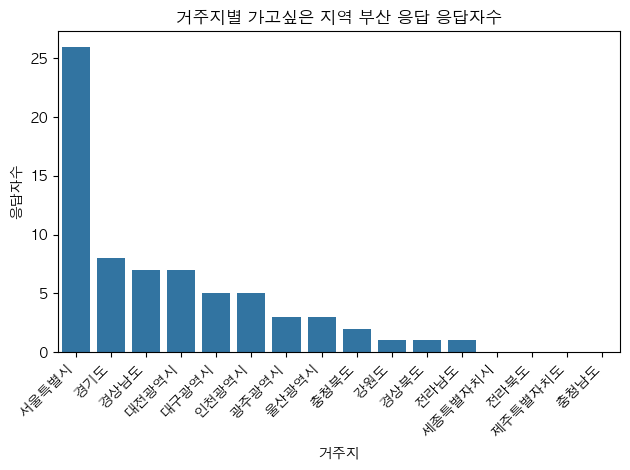

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

want_busan['비율'] = want_busan['거주지별_부산응답자수'] / want_busan['전체'] *100
# '비율' 기준으로 내림차순 정렬
want_busan_sorted = want_busan.sort_values('비율', ascending=False)

# 막대 그래프 그리기 (sns 사용)
sns.barplot(x='거주지', y='비율', data=want_busan_sorted)

plt.xlabel('거주지')
plt.ylabel('비율 (%)')
plt.title('거주지별 가고싶은 지역 부산 응답 비율')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()
# 막대 그래프 그리기 (sns 사용)
want_busan_sorted_num = want_busan.sort_values('거주지별_부산응답자수', ascending=False)
sns.barplot(x='거주지', y='거주지별_부산응답자수', data=want_busan_sorted_num)

plt.xlabel('거주지')
plt.ylabel('응답자수')
plt.title('거주지별 가고싶은 지역 부산 응답 응답자수')
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.tight_layout()  # 그래프 레이아웃 조정
plt.show()

## BQ1: ‘부산’의 이미지


In [224]:
image_of_busan = test['BQ1'].value_counts()
df_display_centered(image_of_busan.head(10))

,BQ1
바다,205
해운대,98
없음,64
항구,26
갈매기,21
항구도시,21
제2의 도시,11
바닷가,8
노인과 바다,7
해운대 바다,6


## 

In [241]:
bq_range = [f'BQ2_{number}' for number in range(1,31)]
word_mapping = {
    0: "na",
    1: '고급스러운/품격있는',
    2: '글로벌한',
    3: '깨끗한/위생적인',
    4: '독특한/차별화된',
    5: '따뜻한',
    6: '맛있는',
    7: '믿을 수 있는/신뢰가 가는',
    8: '복잡한',
    9: '사회에 공헌하는',
    10: '새로운',
    11: '소통하는',
    12: '스마트한',
    13: '아름다운',
    14: '안전한',
    15: '예술적인',
    16: '자유로운',
    17: '재미있는/즐거운',
    18: '전문적인',
    19: '전통적인',
    20: '젊은',
    21: '친근한/친숙한',
    22: '친절한',
    23: '트렌디한',
    24: '포용하는',
    25: '편리한',
    26: '함께하는/상생하는',
    27: '행복한',
    28: '혁신적인/선도하는',
    29: '환경 친화적인',
    30: '활기찬/역동적'
}

df=test[bq_range].fillna(0).apply(lambda x :  x.map(word_mapping))
df['단어모음'] = ''

# 각 행별로 'na'가 아닌 단어 추출하여 '단어모음' 컬럼에 입력
for i in range(len(df)):
    words = []
    for col in df.columns:
        if df.loc[i, col] != 'na':
            words.append(df.loc[i, col])
    df.loc[i, '단어모음'] = ', '.join(words)

df_display_centered(df['단어모음'])

,단어모음
0,"복잡한, 아름다운, 안전한, 자유로운, 편리한,"
1,"글로벌한, 아름다운, 자유로운, 재미있는/즐거운, 친근한/친숙한, 친절한,"
2,"맛있는, 아름다운, 예술적인, 친근한/친숙한, 트렌디한,"
3,"글로벌한, 복잡한, 아름다운, 자유로운, 활기찬/역동적,"
4,"글로벌한, 맛있는, 재미있는/즐거운, 트렌디한, 활기찬/역동적,"
5,"글로벌한, 복잡한, 아름다운, 예술적인, 활기찬/역동적,"
6,"독특한/차별화된, 맛있는, 소통하는, 자유로운, 전문적인, 활기찬/역동적,"
7,"아름다운, 재미있는/즐거운, 젊은, 트렌디한, 활기찬/역동적,"
8,"글로벌한, 복잡한, 새로운, 트렌디한, 편리한, 활기찬/역동적,"
9,"독특한/차별화된, 소통하는, 아름다운, 자유로운, 재미있는/즐거운,"


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5065 entries, 0 to 5064
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   EMD_CD      5065 non-null   int64   
 1   EMD_ENG_NM  5065 non-null   object  
 2   EMD_KOR_NM  5065 non-null   object  
 3   geometry    5065 non-null   geometry
dtypes: geometry(1), int64(1), object(2)
memory usage: 158.4+ KB


,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
467,26110101,Yeongju-dong,영주동,"POLYGON ((1139632.9 1681213.674, 1139636.835 1..."
468,26110102,Daechang-dong 1(il)-ga,대창동1가,"POLYGON ((1140049.895 1680437.172, 1140050.706..."
469,26110103,Daechang-dong 2(i)-ga,대창동2가,"POLYGON ((1140176.261 1680718.143, 1140174.327..."
470,26110104,Jungang-dong 1(il)-ga,중앙동1가,"POLYGON ((1139972.919 1679410.038, 1139968.995..."
471,26110105,Jungang-dong 2(i)-ga,중앙동2가,"POLYGON ((1139923.268 1679523.831, 1139904.386..."


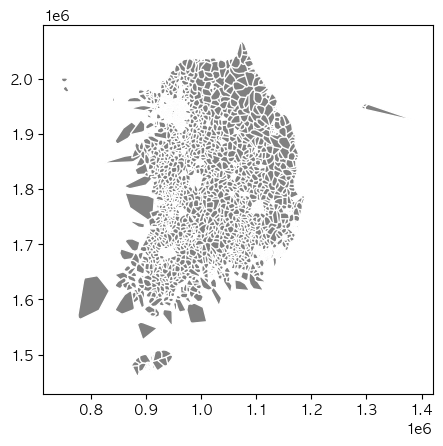

In [261]:

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
# prepare and read data
F1 = './Data/mapshapefile/emd_20230729/emd.shp' 
D1 = gpd.read_file(F1, encoding='cp949')
D1.head()
# 출처: https://wscode.tistory.com/57 [개발자 우성우:티스토리]
D1.convex_hull.plot(color='gray', edgecolor="w")
df1 = D1.astype({ 'EMD_CD' : 'int' })
df1.info()
busan = df1[(df1['EMD_CD'] > 26000000) & (df1['EMD_CD'] < 26720000)]
busan.head()


    

In [291]:
busan = df1[(df1['EMD_CD'] > 26000000) & (df1['EMD_CD'] < 26720000)]
해운대 =df1[(df1['EMD_CD'] > 26350000) & (df1['EMD_CD'] < 26351100)]
해운대

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
588,26350101,Bansong-dong,반송동,"POLYGON ((1148833.245 1694665.677, 1148836.184..."
589,26350102,Seokdae-dong,석대동,"POLYGON ((1147135.603 1693021.963, 1147143.266..."
590,26350103,Banyeo-dong,반여동,"POLYGON ((1147123.823 1692139.269, 1147123.823..."
591,26350104,Jaesong-dong,재송동,"POLYGON ((1148107.581 1690011.807, 1148122.689..."
592,26350105,U-dong,우동,"MULTIPOLYGON (((1147595.2 1687723.122, 1147698..."
593,26350106,Jung-dong,중동,"POLYGON ((1151191.344 1686184.435, 1151231.212..."
594,26350107,Jwa-dong,좌동,"POLYGON ((1150447.086 1690772.149, 1150521.945..."
595,26350108,Songjeong-dong,송정동,"POLYGON ((1153655.837 1688932.639, 1153715.171..."


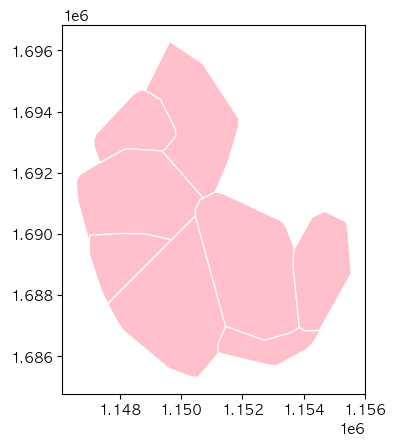

In [292]:
ax = 해운대.convex_hull.plot(color='pink', edgecolor="w")          
# ax.set_axis_off()                            # 축제거
plt.show()


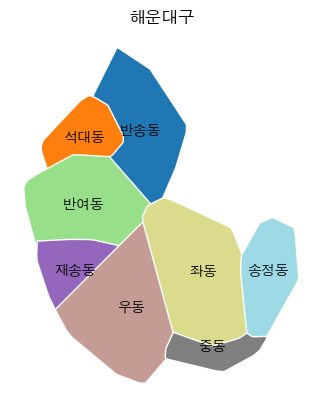

In [293]:
import geopandas as gpd
import matplotlib.pyplot as plt



# 컬러맵 생성 (다양한 색상 사용)
cmap = plt.cm.get_cmap('tab20', len(해운대))  # 'tab20' 컬러맵 사용

# 각 구역에 대한 색상 목록 생성
colors = [cmap(i) for i in range(len(해운대))]

# 각 구역별 색상 적용
ax = 해운대.convex_hull.plot(color=colors, edgecolor="w")

# 각 구역 이름 표시
for i, row in 해운대.iterrows():
    # 레이블 위치 계산
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['EMD_KOR_NM'], fontsize=10, ha='center', va='center', color='black')

# 축 제거
ax.set_axis_off()
plt.title("해운대구")
plt.show()

In [304]:
import pandas as pd

data = {
    'EMD_KOR_NM': ['우동', '좌동', '중동', '반송동', '송정동', '반여동', '재송동','석대동'],
    '청년인구': [10377, 12165, 4676, 3001, 1013, 8867, 6342,0]
}

해운대인구= pd.DataFrame(data)
test=해운대

test_merge=test.merge(해운대인구, on ='EMD_KOR_NM', how='left')


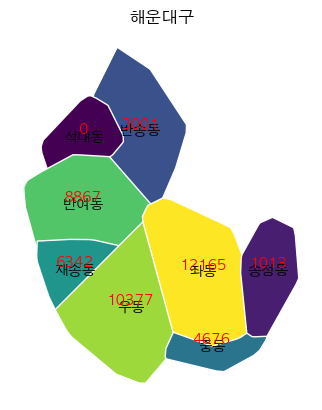

In [312]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ... (test_merge GeoDataFrame 로드) ...

# 컬러맵 생성 (청년인구 수에 따라 색상 변화)
cmap = cm.get_cmap('viridis', 256)  # 'viridis' 컬러맵 사용

# 청년인구 값을 0~255 사이의 값으로 변환 (컬러맵 인덱스)
norm = plt.Normalize(vmin=test_merge['청년인구'].min(), vmax=test_merge['청년인구'].max())
colors = [cmap(norm(val)) for val in test_merge['청년인구']]

# 각 구역별 색상 적용
ax = test_merge.convex_hull.plot(color=colors, edgecolor="w")

# 각 구역 이름 표시
for i, row in test_merge.iterrows():
    # 레이블 위치 계산
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['EMD_KOR_NM'], fontsize=10, ha='center', va='center', color='black')
    ax.text(centroid.x, centroid.y-10, row['청년인구'], fontsize=10, ha='center', va='bottom', color='red')

# 축 제거
ax.set_axis_off()
plt.title("해운대구")
plt.show()


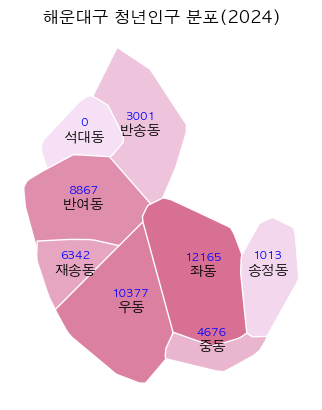

In [322]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# ... (test_merge GeoDataFrame 로드) ...

# 핑크색 명암 컬러맵 생성
cmap = mcolors.LinearSegmentedColormap.from_list(
    "my_pink_cmap", ["#F5E0F5", "#D87093"]  # 밝은 핑크색에서 진한 핑크색으로
)

# 청년인구 값을 0~255 사이의 값으로 변환 (컬러맵 인덱스)
norm = plt.Normalize(vmin=test_merge['청년인구'].min(), vmax=test_merge['청년인구'].max())
colors = [cmap(norm(val)) for val in test_merge['청년인구']]

# 각 구역별 색상 적용
ax = test_merge.convex_hull.plot(color=colors, edgecolor="w")

# 각 구역 이름 표시
for i, row in test_merge.iterrows():
    # 레이블 위치 계산
    centroid = row.geometry.centroid
    ax.text(centroid.x, centroid.y, row['EMD_KOR_NM'], fontsize=10, ha='center', va='center', color='black')
    ax.text(centroid.x, centroid.y+300, row['청년인구'], fontsize=8, ha='center', va='bottom', color='blue')

# 축 제거
ax.set_axis_off()
plt.title("해운대구 청년인구 분포(2024)")
plt.show()